# 1.2 Procedures and the Processes They Generate

We have now considered the elements of programming: We have used primitive arithmetic operations, we have combined these operations, and we have abstracted these composite operations by defining them as compound procedures. But that is not enough to enable us to say that we know how to program. Our situation is analogous to that of someone who has learned the rules for how the pieces move in chess but knows nothing of typical openings, tactics, or strategy. Like the novice chess player, we don’t yet know the common patterns of usage in the domain. We lack the knowledge of which moves are worth making (which procedures are worth defining). We lack the experience to predict the consequences of making a move (executing a procedure).

The ability to visualize the consequences of the actions under consideration is crucial to becoming an expert programmer, just as it is in any synthetic, creative activity. In becoming an expert photographer, for example, one must learn how to look at a scene and know how dark each region will appear on a print for each possible choice of exposure and development conditions. Only then can one reason backward, planning framing, lighting, exposure, and development to obtain the desired effects. So it is with programming, where we are planning the course of action to be taken by a process and where we control the process by means of a program. To become experts, we must learn to visualize the processes generated by various types of procedures. Only after we have developed such a skill can we learn to reliably construct programs that exhibit the desired behavior.

A procedure is a pattern for the *local evolution* of a computational process. It specifies how each stage of the process is built upon the previous stage. We would like to be able to make statements about the overall, or *global*, behavior of a process whose local evolution has been specified by a procedure. This is very difficult to do in general, but we can at least try to describe some typical patterns of process evolution.

In this section we will examine some common “shapes” for processes generated by simple procedures. We will also investigate the rates at which these processes consume the important computational resources of time and space. The procedures we will consider are very simple. Their role is like that played by test patterns in photography: as oversimplified prototypical patterns, rather than practical examples in their own right.


## 1.2.1 Linear Recursion and Iteration

We begin by considering the factorial function, defined by 

$$n!\, = \,{n \cdot (n - 1)} \cdot {(n - 2)}\cdots{3 \cdot 2 \cdot 1.}$$

 There are many ways to compute factorials. One way is to make use of the observation that $n!$ is equal to $n$ times $(n - 1)!$ for any positive integer $n$: 

$$n!\, = \,{n \cdot \lbrack(n - 1)} \cdot {(n - 2)}\cdots{3 \cdot 2 \cdot 1\rbrack}\, = \,{n \cdot (n - 1)!.}$$

 Thus, we can compute $n!$ by computing $(n - 1)!$ and multiplying the result by $n$. If we add the stipulation that 1! is equal to 1, this observation translates directly into a procedure:
 
```scheme
(define (factorial n)
  (if (= n 1) 
      1 
      (* n (factorial (- n 1)))))
```

We can use the substitution model of [1.1.5](./1.1_The_Elements_of_Programming.ipynb#1.1.5-The-Substitution-Model-for-Procedure-Application) to watch this procedure in action computing 6!, as shown in [Figure 1.3](#Figure-1_002e3).

![](fig/chap1/Fig1.3d.std.svg)
**Figure 1.3:** A linear recursive process for computing 6!.

Now let’s take a different perspective on computing factorials. We could describe a rule for computing $n!$ by specifying that we first multiply 1 by 2, then multiply the result by 3, then by 4, and so on until we reach $n$. More formally, we maintain a running product, together with a counter that counts from 1 up to $n$. We can describe the computation by saying that the counter and the product simultaneously change from one step to the next according to the rule

```
product ← counter * product

counter ← counter + 1
```

and stipulating that $n!$ is the value of the product when the counter exceeds $n$.

Once again, we can recast our description as a procedure for computing factorials:

^[In a real program we would probably use the block structure introduced in the last section to hide the definition of `fact-iter`:]

```scheme
(define (factorial n) 
  (fact-iter 1 1 n))

(define (fact-iter product counter max-count)
  (if (> counter max-count)
      product
      (fact-iter (* counter product)
                 (+ counter 1)
                 max-count)))       
```

As before, we can use the substitution model to visualize the process of computing 6!, as shown in [Figure 1.4](#Figure-1_002e4).

![](fig/chap1/Fig1.4d.std.svg)

**Figure 1.4:** A linear iterative process for computing 6!.

Compare the two processes. From one point of view, they seem hardly different at all. Both compute the same mathematical function on the same domain, and each requires a number of steps proportional to $n$ to compute $n!$. Indeed, both processes even carry out the same sequence of multiplications, obtaining the same sequence of partial products. On the other hand, when we consider the “shapes” of the two processes, we find that they evolve quite differently.

Consider the first process. The substitution model reveals a shape of expansion followed by contraction, indicated by the arrow in [Figure 1.3](#Figure-1_002e3). The expansion occurs as the process builds up a chain of *deferred operations* (in this case, a chain of multiplications). The contraction occurs as the operations are actually performed. This type of process, characterized by a chain of deferred operations, is called a *recursive process*. Carrying out this process requires that the interpreter keep track of the operations to be performed later on. In the computation of $n!$, the length of the chain of deferred multiplications, and hence the amount of information needed to keep track of it, grows linearly with $n$ (is proportional to $n$), just like the number of steps. Such a process is called a *linear recursive process*.

By contrast, the second process does not grow and shrink. At each step, all we need to keep track of, for any $n$, are the current values of the variables `product`, `counter`, and `max-count`. We call this an *iterative process*. In general, an iterative process is one whose state can be summarized by a fixed number of *state variables*, together with a fixed rule that describes how the state variables should be updated as the process moves from state to state and an (optional) end test that specifies conditions under which the process should terminate. In computing $n!$, the number of steps required grows linearly with $n$. Such a process is called a *linear iterative process*.

The contrast between the two processes can be seen in another way. In the iterative case, the program variables provide a complete description of the state of the process at any point. If we stopped the computation between steps, all we would need to do to resume the computation is to supply the interpreter with the values of the three program variables. Not so with the recursive process. In this case there is some additional “hidden” information, maintained by the interpreter and not contained in the program variables, which indicates “where the process is” in negotiating the chain of deferred operations. The longer the chain, the more information must be maintained.^[When we discuss the implementation of procedures on register machines in Chapter 5, we will see that any iterative process can be realized “in hardware” as a machine that has a fixed set of registers and no auxiliary memory. In contrast, realizing a recursive process requires a machine that uses an auxiliary data structure known as a *stack*.]

In contrasting iteration and recursion, we must be careful not to confuse the notion of a recursive *process* with the notion of a recursive *procedure*. When we describe a procedure as recursive, we are referring to the syntactic fact that the procedure definition refers (either directly or indirectly) to the procedure itself. But when we describe a process as following a pattern that is, say, linearly recursive, we are speaking about how the process evolves, not about the syntax of how a procedure is written. It may seem disturbing that we refer to a recursive procedure such as `fact-iter` as generating an iterative process. However, the process really is iterative: Its state is captured completely by its three state variables, and an interpreter need keep track of only three variables in order to execute the process.

One reason that the distinction between process and procedure may be confusing is that most implementations of common languages (including Ada, Pascal, and C) are designed in such a way that the interpretation of any recursive procedure consumes an amount of memory that grows with the number of procedure calls, even when the process described is, in principle, iterative. As a consequence, these languages can describe iterative processes only by resorting to special-purpose “looping constructs” such as `do`, `repeat`, `until`, `for`, and `while`. The implementation of Scheme we shall consider in Chapter 5 does not share this defect. It will execute an iterative process in constant space, even if the iterative process is described by a recursive procedure. An implementation with this property is called *tail-recursive*. With a tail-recursive implementation, iteration can be expressed using the ordinary procedure call mechanism, so that special iteration constructs are useful only as syntactic sugar.^[Tail recursion has long been known as a compiler optimization trick. A coherent semantic basis for tail recursion was provided by Carl [Hewitt (1977)](References.xhtml#Hewitt-_00281977_0029), who explained it in terms of the “message-passing” model of computation that we shall discuss in Chapter 3. Inspired by this, Gerald Jay Sussman and Guy Lewis Steele Jr. (see [Steele and Sussman 1975](References.xhtml#Steele-and-Sussman-1975)) constructed a tail-recursive interpreter for Scheme. Steele later showed how tail recursion is a consequence of the natural way to compile procedure calls ([Steele 1977](References.xhtml#Steele-1977)). The IEEE standard for Scheme requires that Scheme implementations be tail-recursive.]

**Exercise 1.9:** Each of the following two procedures defines a method for adding two positive integers in terms of the procedures `inc`, which increments its argument by 1, and `dec`, which decrements its argument by 1.

```scheme
(define (+ a b)
  (if (= a 0) 
      b 
      (inc (+ (dec a) b))))

(define (+ a b)
  (if (= a 0) 
      b 
      (+ (dec a) (inc b))))
```

Using the substitution model, illustrate the process generated by each procedure in evaluating `(+ 4 5)`. Are these processes iterative or recursive?

Below is recursive
```scheme
(define (+ a b)
  (if (= a 0) 
      b 
      (inc (+ (dec a) b))))

(+ 4 5)
(inc (+ 3 5))
(inc (inc (+ 2 5)))
(inc (inc (inc (+ 1 5))))
(inc (inc (inc (inc (+ 0 5)))))
(inc (inc (inc (inc 5))))
(inc (inc (inc 6)))
(inc (inc 7))
(inc 8)
9
```

Second one is iterative
```scheme
(define (+ a b)
  (if (= a 0) 
      b 
      (+ (dec a) (inc b))))

(+ 4 5)
(+ 3 6)
(+ 2 7)
(+ 1 8)
(+ 0 9)
9
```

---

**Exercise 1.10:** The following procedure computes a mathematical function called Ackermann’s function.

```scheme
(define (A x y)
  (cond ((= y 0) 0)
        ((= x 0) (* 2 y))
        ((= y 1) 2)
        (else (A (- x 1)
                 (A x (- y 1))))))
```

What are the values of the following expressions?

```scheme
(A 1 10)
(A 2 4)
(A 3 3)
```

Consider the following procedures, where `A` is the procedure defined above:

```scheme

(define (f n) (A 0 n))
(define (g n) (A 1 n))
(define (h n) (A 2 n))
(define (k n) (* 5 n n))

```

Give concise mathematical definitions for the functions computed by the procedures `f`, `g`, and `h` for positive integer values of $n$. For example, `(k n)` computes $5n^{2}$.

In [10]:
(define (A x y)
  (cond ((= y 0) 0)
        ((= x 0) (* 2 y))
        ((= y 1) 2)
        (else (A (- x 1)
                 (A x (- y 1))))))

(display(A 1 10))(newline)
(display(A 2 4))(newline)
(display(A 3 3))(newline)

(display(A 2 1))(newline)
(display(A 2 2))(newline)
(display(A 2 3))(newline)
(display(A 2 4))(newline)

1024
65536
65536
2
4
16
65536


$$
(k,n) \Rightarrow 2n \\
(g,n) \Rightarrow 2^n \\
(h,n) \Rightarrow 2\uparrow\uparrow n
$$

[This ariticle](https://mathworld.wolfram.com/AckermannFunction.html) had good explaination.

---

## 1.2.2 Tree Recursion

Another common pattern of computation is called *tree recursion*. As an example, consider computing the sequence of Fibonacci numbers, in which each number is the sum of the preceding two:

0, 1, 1, 2, 3, 5, 8, 13, 21, ….

In general, the Fibonacci numbers can be defined by the rule 

$$\text{Fib}(n)\; = \;\begin{cases}
0 & {\;\text{if}\;\; n = 0,} \\
1 & {\;\text{if}\;\; n = 1,} \\
{\text{Fib}(n - 1) + \text{Fib}(n - 2)} & {\;\text{otherwise}.} \\
\end{cases}$$

We can immediately translate this definition into a recursive procedure for computing Fibonacci numbers:
 
```scheme
(define (fib n)
  (cond ((= n 0) 0)
        ((= n 1) 1)
        (else (+ (fib (- n 1))
                 (fib (- n 2))))))
```

Consider the pattern of this computation. To compute `(fib 5)`, we compute `(fib 4)` and `(fib 3)`. To compute `(fib 4)`, we compute `(fib 3)` and `(fib 2)`. In general, the evolved process looks like a tree, as shown in [Figure 1.5](#Figure-1_002e5). Notice that the branches split into two at each level (except at the bottom); this reflects the fact that the `fib` procedure calls itself twice each time it is invoked.

![](fig/chap1/Fig1.5d.std.svg)
**Figure 1.5:** The tree-recursive process generated in computing `(fib 5)`.

This procedure is instructive as a prototypical tree recursion, but it is a terrible way to compute Fibonacci numbers because it does so much redundant computation. Notice in [Figure 1.5](#Figure-1_002e5) that the entire computation of `(fib 3)`—almost half the work—is duplicated. In fact, it is not hard to show that the number of times the procedure will compute `(fib 1)` or `(fib 0)` (the number of leaves in the above tree, in general) is precisely $\text{Fib}(n + 1)$. To get an idea of how bad this is, one can show that the value of $\text{Fib}(n)$ grows exponentially with $n$. More precisely (see [Exercise 1.13](#Exercise-1_002e13)), $\text{Fib}(n)$ is the closest integer to $\varphi^{n}/\sqrt{5}$, where 

$$\varphi\, = \,\frac{1 + \sqrt{5}}{2}\, \approx \, 1.6180$$

 is the *golden ratio*, which satisfies the equation 

$$\varphi^{2}\, = \,{\varphi + 1.}$$

 Thus, the process uses a number of steps that grows exponentially with the input. On the other hand, the space required grows only linearly with the input, because we need keep track only of which nodes are above us in the tree at any point in the computation. In general, the number of steps required by a tree-recursive process will be proportional to the number of nodes in the tree, while the space required will be proportional to the maximum depth of the tree.

We can also formulate an iterative process for computing the Fibonacci numbers. The idea is to use a pair of integers $a$ and $b$, initialized to $\text{Fib(1) = 1}$ and $\text{Fib(0) = 0}$, and to repeatedly apply the simultaneous transformations

$$\begin{array}{l}
{a\;\leftarrow\; a + b,} \\
{b\;\leftarrow\; a.} \\
\end{array}$$

It is not hard to show that, after applying this transformation $n$ times, $a$ and $b$ will be equal, respectively, to $\text{Fib}(n + 1)$ and $\text{Fib}(n)$. Thus, we can compute Fibonacci numbers iteratively using the procedure

```scheme
(define (fib n) 
  (fib-iter 1 0 n))

(define (fib-iter a b count)
  (if (= count 0)
      b
      (fib-iter (+ a b) a (- count 1))))
```

This second method for computing $\text{Fib}(n)$ is a linear iteration. The difference in number of steps required by the two methods—one linear in $n$, one growing as fast as $\text{Fib}(n)$ itself—is enormous, even for small inputs.

One should not conclude from this that tree-recursive processes are useless. When we consider processes that operate on hierarchically structured data rather than numbers, we will find that tree recursion is a natural and powerful tool.^[An example of this was hinted at in [1.1.3](1_002e1.xhtml#g_t1_002e1_002e3). The interpreter itself evaluates expressions using a tree-recursive process.] But even in numerical operations, tree-recursive processes can be useful in helping us to understand and design programs. For instance, although the first `fib` procedure is much less efficient than the second one, it is more straightforward, being little more than a translation into Lisp of the definition of the Fibonacci sequence. To formulate the iterative algorithm required noticing that the computation could be recast as an iteration with three state variables.


### Example: Counting change

It takes only a bit of cleverness to come up with the iterative Fibonacci algorithm. In contrast, consider the following problem: How many different ways can we make change of \$1.00, given half-dollars, quarters, dimes, nickels, and pennies? More generally, can we write a procedure to compute the number of ways to change any given amount of money?

This problem has a simple solution as a recursive procedure. Suppose we think of the types of coins available as arranged in some order. Then the following relation holds:

The number of ways to change amount $a$ using $n$ kinds of coins equals

- the number of ways to change amount $a$ using all but the first kind of coin, plus
- the number of ways to change amount $a - d$ using all $n$ kinds of coins, where $d$ is the denomination of the first kind of coin.

To see why this is true, observe that the ways to make change can be divided into two groups: those that do not use any of the first kind of coin, and those that do. Therefore, the total number of ways to make change for some amount is equal to the number of ways to make change for the amount without using any of the first kind of coin, plus the number of ways to make change assuming that we do use the first kind of coin. But the latter number is equal to the number of ways to make change for the amount that remains after using a coin of the first kind.

Thus, we can recursively reduce the problem of changing a given amount to the problem of changing smaller amounts using fewer kinds of coins. Consider this reduction rule carefully, and convince yourself that we can use it to describe an algorithm if we specify the following degenerate cases:^[For example, work through in detail how the reduction rule applies to the problem of making change for 10 cents using pennies and nickels.]

- If $a$ is exactly 0, we should count that as 1 way to make change.
- If $a$ is less than 0, we should count that as 0 ways to make change.
- If $n$ is 0, we should count that as 0 ways to make change.

We can easily translate this description into a recursive procedure:

```scheme
(define (count-change amount)
  (cc amount 5))

(define (cc amount kinds-of-coins)
  (cond ((= amount 0) 1)
        ((or (< amount 0) 
             (= kinds-of-coins 0)) 
         0)
        (else 
         (+ (cc amount (- kinds-of-coins 1))
            (cc (- amount (first-denomination 
                           kinds-of-coins))
                kinds-of-coins)))))

(define (first-denomination kinds-of-coins)
  (cond ((= kinds-of-coins 1) 1)
        ((= kinds-of-coins 2) 5)
        ((= kinds-of-coins 3) 10)
        ((= kinds-of-coins 4) 25)
        ((= kinds-of-coins 5) 50)))

```

(The `first-denomination` procedure takes as input the number of kinds of coins available and returns the denomination of the first kind. Here we are thinking of the coins as arranged in order from largest to smallest, but any order would do as well.) We can now answer our original question about changing a dollar:

```scheme
(count-change 100)
292
```

`Count-change` generates a tree-recursive process with redundancies similar to those in our first implementation of `fib`. (It will take quite a while for that 292 to be computed.) On the other hand, it is not obvious how to design a better algorithm for computing the result, and we leave this problem as a challenge. The observation that a tree-recursive process may be highly inefficient but often easy to specify and understand has led people to propose that one could get the best of both worlds by designing a “smart compiler” that could transform tree-recursive procedures into more efficient procedures that compute the same result.^[One approach to coping with redundant computations is to arrange matters so that we automatically construct a table of values as they are computed. Each time we are asked to apply the procedure to some argument, we first look to see if the value is already stored in the table, in which case we avoid performing the redundant computation. This strategy, known as *tabulation* or *memoization*, can be implemented in a straightforward way. Tabulation can sometimes be used to transform processes that require an exponential number of steps (such as `count-change`) into processes whose space and time requirements grow linearly with the input. See [Exercise 3.27](3_002e3.xhtml#Exercise-3_002e27).]

**Exercise 1.11:** A function $f$ is defined by the rule that $f(n) = n$ if $n < 3$ and ${f(n)} = {f(n - 1)} + {2f(n - 2)} + {3f(n - 3)}$ if $n \geq 3$. Write a procedure that computes $f$ by means of a recursive process. Write a procedure that computes $f$ by means of an iterative process.

In [1]:
;; recursive
(define (f n)
  (if (< n 3)
      n
      (+ (f (- n 1)) (* 2 (f (- n 2))) (* 3 (f (- n 3))))))

(display (f 2))(display ", ")
(display (f 3))(display ", ")
(display (f 4))(display ", ")
(display (f 5))(display ", ")
(display (f 6))(display ", ")
(display (f 7))

2, 4, 11, 25, 59, 142

In [2]:
;; iterative
(define (f n)
  (if (< n 3)
      n
      (f-iter 2 1 0 (- n 3))
      ))

(define (f-iter a b c count)
  (if (= 0 count)
      (+ a (* 2 b) (* 3 c))
      (f-iter (+ a (* 2 b) (* 3 c)) a b (- count 1))
      ))

(display (f 2))(display ", ")
(display (f 3))(display ", ")
(display (f 4))(display ", ")
(display (f 5))(display ", ")
(display (f 6))(display ", ")
(display (f 7))


2, 4, 11, 25, 59, 142

**Exercise 1.12:** The following pattern of numbers is called *Pascal’s triangle*.

```scheme
         1
       1   1
     1   2   1
   1   3   3   1
 1   4   6   4   1
       . . .
```

The numbers at the edge of the triangle are all 1, and each number inside the triangle is the sum of the two numbers above it.

>The elements of Pascal’s triangle are called the *binomial coefficients*, because the $n^{\text{th}}$ row consists of the coefficients of the terms in the expansion of $(x + y)^{n}$. This pattern for computing the coefficients appeared in Blaise Pascal’s 1653 seminal work on probability theory, Traité du triangle arithmétique. According to [Knuth (1973)](References.xhtml#Knuth-_00281973_0029), the same pattern appears in the Szu-yuen Yü-chien (“The Precious Mirror of the Four Elements”), published by the Chinese mathematician Chu Shih-chieh in 1303, in the works of the twelfth-century Persian poet and mathematician Omar Khayyam, and in the works of the twelfth-century Hindu mathematician Bháscara Áchárya. 

Write a procedure that computes elements of Pascal’s triangle by means of a recursive process.

In [2]:
;; row, col start form 1
(define (pascal row col)
  (cond ((or (= col 1) (= row 1) (= col row)) 1)
        ((> col row) -1)
        (else (+ (pascal (- row 1) (- col 1)) 
                 (pascal (- row 1) col)))))

;; to pretty print the triangle, 
;; we need knowledge of list(data structure) and format print

**Exercise 1.13:** Prove that $\text{Fib}(n)$ is the closest integer to $\varphi^{n}/\sqrt{5}$, where $\varphi = {(1 + \sqrt{5})/2}$. Hint: Let $\psi = {(1 - \sqrt{5})/2}$. Use induction and the definition of the Fibonacci numbers (see [1.2.2](#g_t1_002e2_002e2)) to prove that ${\text{Fib}(n)} = {(\varphi^{n} - \psi^{n})/\sqrt{5}}$.

Base Case $\left(n=1\right)$

$$
\text{Fib}(1) = \frac{(\varphi^{1} - \psi^{1})}{\sqrt{5}} = \frac{(1+\sqrt5)/2 - (1-\sqrt5)/2}{\sqrt5} = \frac{\sqrt 5 }{\sqrt 5} = 1
$$

Inductive Step $\left(n \longrightarrow n+1\right)$

$$
\text{Fib}(n+1) = \frac{(\varphi^{n+1} - \psi^{n+1})}{\sqrt{5}} = \frac{(1 + \sqrt{5})^{n+1} - (1-\sqrt{5})^{n+1}}{2^{n+1}\sqrt{5}}\\
\text{Fib}(n+1) = \text{Fib}(n) + \text{Fib}(n-1) = \frac{(\varphi^{n} - \psi^{n})}{\sqrt{5}} + \frac{(\varphi^{n-1} - \psi^{n-1})}{\sqrt{5}} 
$$

Let $a, b = (1 + \sqrt{5}), (1 - \sqrt{5})$, then

$$
\text{Fib}(n+1) = \frac{(a/2)^{n} - b/2)^{n})}{\sqrt{5}} + \frac{(a/2)^{n-1} - b/2)^{n-1})}{\sqrt{5}} \\
= \frac{a^{n} - b^{n}}{2^{n} \cdot \sqrt{5}} + \frac{a^{n-1} - b^{n-1}}{2^{n-1} \cdot \sqrt{5}} \\
= \frac{2 \cdot [a^{n} - b^{n}] + 4\cdot[a^{n-1} - b^{n-1})]}{2^{n+1}\sqrt{5}}\\
= \frac{2a^{n} - 2b^{n} + 4a^{n-1} - 4b^{n-1}}{2^{n+1}\sqrt{5}}\\
= \frac{2a \cdot a^{n-1} + 4a^{n-1} - 2b \cdot b^{n-1} - 4b^{n-1}}{2^{n+1}\sqrt{5}}\\
= \frac{a^{n-1}(2a + 4) - b^{n-1}(2b + 4)}{2^{n+1}\sqrt{5}}\\
= \frac{a^{n-1}(2(1 + \sqrt{5}) + 4) - b^{n-1}(2(1-\sqrt{5}) + 4)}{2^{n+1}\sqrt{5}}\\
= \frac{a^{n-1}(2 + 2\sqrt{5} + 4) - b^{n-1}(2-2\sqrt{5} + 4)}{2^{n+1}\sqrt{5}}\\
= \frac{a^{n-1}(1 + 2\sqrt{5} + 5) - b^{n-1}(1-2\sqrt{5} + 5)}{2^{n+1}\sqrt{5}}\\
= \frac{a^{n-1}(1 + \sqrt{5})^{2} - b^{n-1}(1 - \sqrt{5})^{2}}{2^{n+1}\sqrt{5}}\\
= \frac{a^{n-1}a^{2} - b^{n-1}b^{2}}{2^{n+1}\sqrt{5}} = \frac{a^{n-1+2} - b^{n-1+2}}{2^{n+1}\sqrt{5}} = \frac{a^{n+1} - b^{n+1}}{2^{n+1}\sqrt{5}}\\
= \frac{(1 + \sqrt{5})^{n+1} - (1-\sqrt{5})^{n+1}}{2^{n+1}\sqrt{5}}
$$

Thus, ${\text{Fib}(n)} = {(\varphi^{n} - \psi^{n})/\sqrt{5}}$.

---

## 1.2.3 Orders of Growth

The previous examples illustrate that processes can differ considerably in the rates at which they consume computational resources. One convenient way to describe this difference is to use the notion of *order of growth* to obtain a gross measure of the resources required by a process as the inputs become larger.

Let $n$ be a parameter that measures the size of the problem, and let $R(n)$ be the amount of resources the process requires for a problem of size $n$. In our previous examples we took $n$ to be the number for which a given function is to be computed, but there are other possibilities. For instance, if our goal is to compute an approximation to the square root of a number, we might take $n$ to be the number of digits accuracy required. For matrix multiplication we might take $n$ to be the number of rows in the matrices. In general there are a number of properties of the problem with respect to which it will be desirable to analyze a given process. Similarly, $R(n)$ might measure the number of internal storage registers used, the number of elementary machine operations performed, and so on. In computers that do only a fixed number of operations at a time, the time required will be proportional to the number of elementary machine operations performed.

We say that $R(n)$ has order of growth $\Theta(f(n))$, written ${R(n)} = {\Theta(f(n))}$ (pronounced “theta of $f(n)$”), if there are positive constants $k_{1}$ and $k_{2}$ independent of $n$ such that ${k_{1}f(n)} \leq {R(n)} \leq {k_{2}f(n)}$ for any sufficiently large value of $n$. (In other words, for large $n$, the value $R(n)$ is sandwiched between $k_{1}f(n)$ and $k_{2}f(n)$.)

For instance, with the linear recursive process for computing factorial described in [1.2.1](#g_t1_002e2_002e1) the number of steps grows proportionally to the input $n$. Thus, the steps required for this process grows as $\Theta(n)$. We also saw that the space required grows as $\Theta(n)$. For the iterative factorial, the number of steps is still $\Theta(n)$ but the space is $\Theta(1)$—that is, constant.

>These statements mask a great deal of oversimplification. For instance, if we count process steps as “machine operations” we are making the assumption that the number of machine operations needed to perform, say, a multiplication is independent of the size of the numbers to be multiplied, which is false if the numbers are sufficiently large. Similar remarks hold for the estimates of space. Like the design and description of a process, the analysis of a process can be carried out at various levels of abstraction. The tree-recursive Fibonacci computation requires $\Theta(\varphi^{n})$ steps and space $\Theta(n)$, where $\varphi$ is the golden ratio described in [1.2.2](#g_t1_002e2_002e2).

Orders of growth provide only a crude description of the behavior of a process. For example, a process requiring $n^{2}$ steps and a process requiring $1000n^{2}$ steps and a process requiring ${3n^{2}} + {10n} + 17$ steps all have $\Theta(n^{2})$ order of growth. On the other hand, order of growth provides a useful indication of how we may expect the behavior of the process to change as we change the size of the problem. For a $\Theta(n)$ (linear) process, doubling the size will roughly double the amount of resources used. For an exponential process, each increment in problem size will multiply the resource utilization by a constant factor. In the remainder of [1.2](#g_t1_002e2) we will examine two algorithms whose order of growth is logarithmic, so that doubling the problem size increases the resource requirement by a constant amount.

**Exercise 1.14:** Draw the tree illustrating the process generated by the `count-change` procedure of [1.2.2](#g_t1_002e2_002e2) in making change for 11 cents. What are the orders of growth of the space and number of steps used by this process as the amount to be changed increases?



With the help from [this](https://recursion.vercel.app/) website and some python code:

```python
coins = [1,5,10,25,50]

def fn(amount, kind):
    if amount == 0: 
        return 1
    elif amount < 0 or kind < 0:
        return 0
    else:
        return fn(amount, kind -1) + fn(amount - coins[kind], kind) 
```

Below recursive tree can be printed.

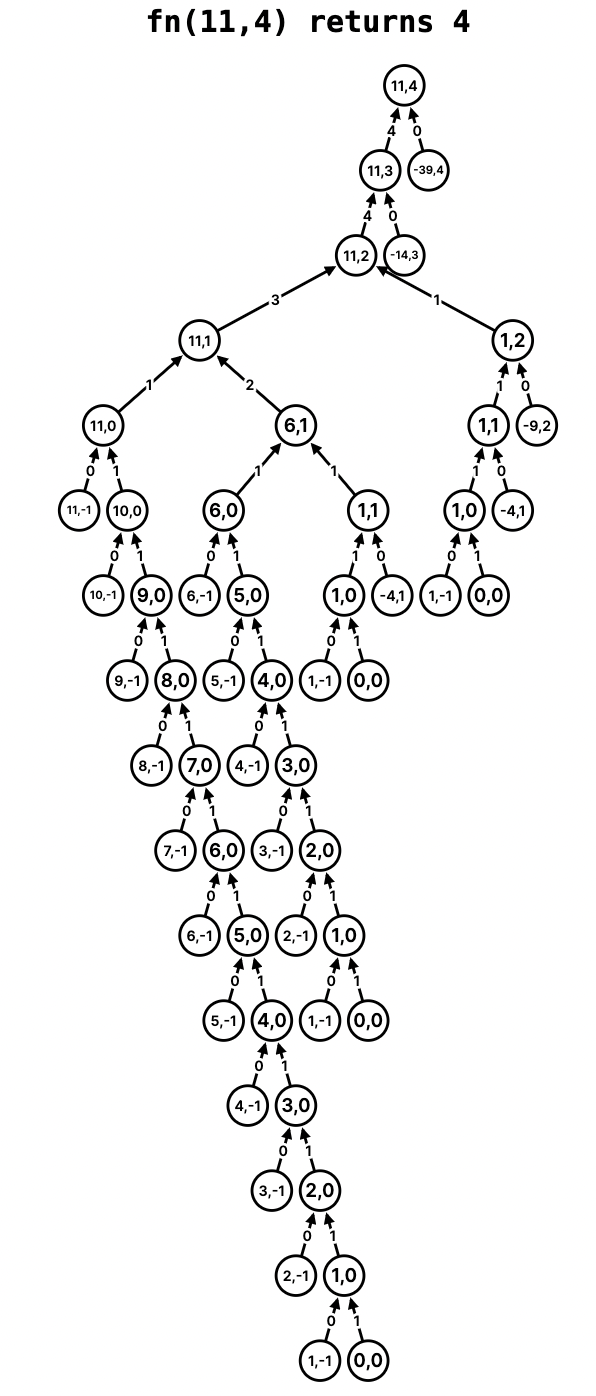

growth of space is $O(n)$ since space of recursive function is decided by the [__maximum depth of the tree__](https://stackoverflow.com/questions/43298938/space-complexity-of-recursive-function), and the depth is decided by `amount` parameter for this function.

number of step is $O(n^m)$ for $m$ is number of different coins, from the recursive tree, we can see each branch has the potential to be calculated and the branch of the recursive tree is decided by the parameter of `kind`. So for each depth of the tree, there are some potential `m` sub-branch needed to be explored. Let's compare `fn(25,0)`(means 25 cent and only have 1 cent coins),`fn(25,1)` and `fn(25,2)` for more intuition. (since visualizer only support limited recursion, we can only set `amount` to a small number and in this comparasion, we can only use coin: __1,5,10__)

fn(15,0)             |   fn(15,2)            |fn(15,4)           
:--------------------:|:--------------------:|:----------:
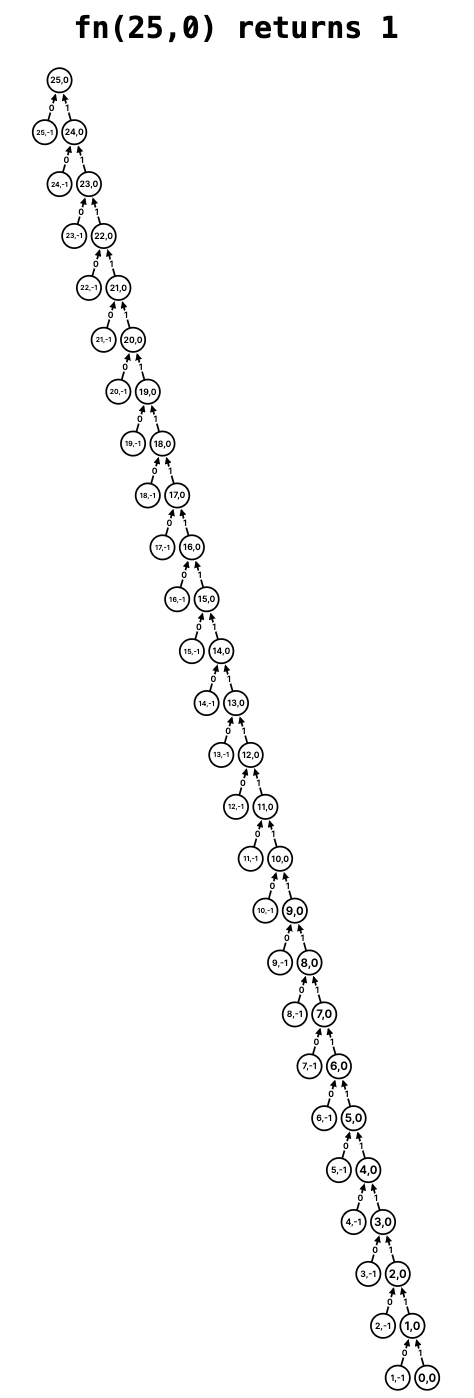| 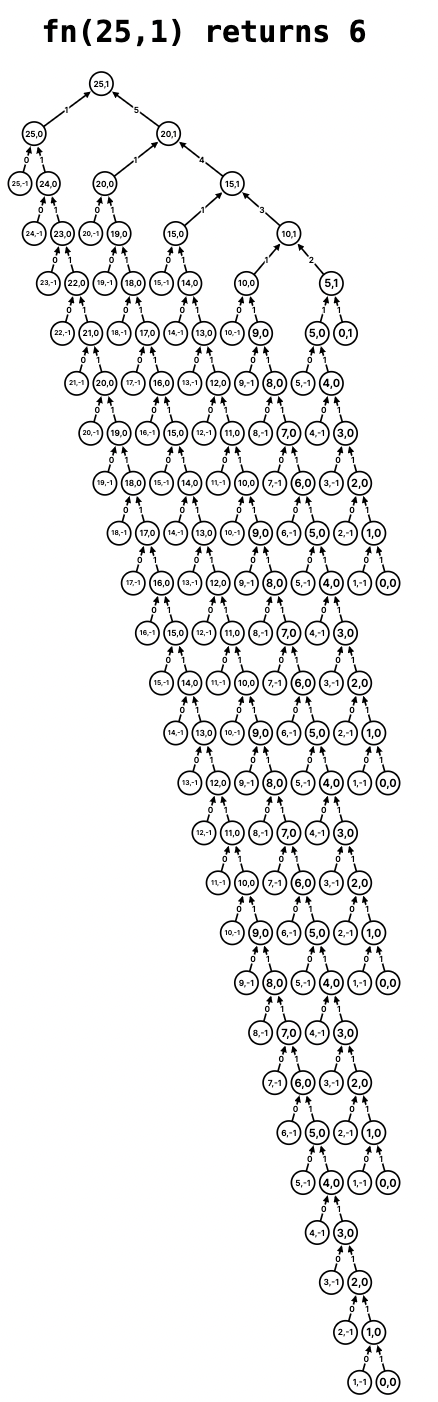 | 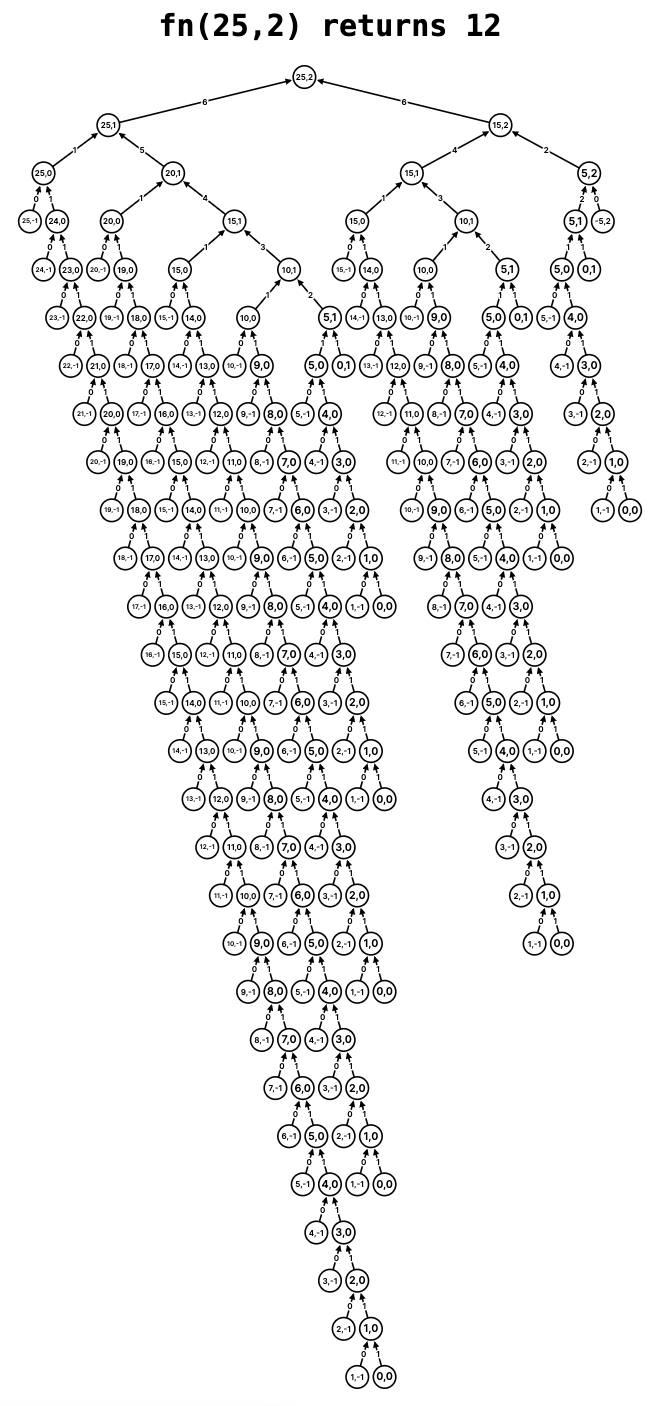

---

**Exercise 1.15:** The sine of an angle (specified in radians) can be computed by making use of the approximation $\sin x \approx x$ if $x$ is sufficiently small, and the trigonometric identity 

$${\sin x}\, = \,{3\sin\frac{x}{3}}\, - \,{4\sin^{3}\frac{x}{3}}$$

to reduce the size of the argument of sin. (For purposes of this exercise an angle is considered “sufficiently small” if its magnitude is not greater than 0.1 radians.) These ideas are incorporated in the following procedures:
 
```scheme
(define (cube x) (* x x x))
(define (p x) (- (* 3 x) (* 4 (cube x))))
(define (sine angle)
   (if (not (> (abs angle) 0.1))
       angle
       (p (sine (/ angle 3.0)))))
```

1.  How many times is the procedure `p` applied when `(sine 12.15)` is evaluated?
2.  What is the order of growth in space and number of steps (as a function of $a$) used by the process generated by the `sine` procedure when `(sine a)` is evaluated?

```python
p = lambda x:3 * x - 4*(x**3)

def fn(angle):
    if not abs(angle) > 0.1:
        return angle
    else:
        return p(fn(angle/3))
```

Tree recursive:

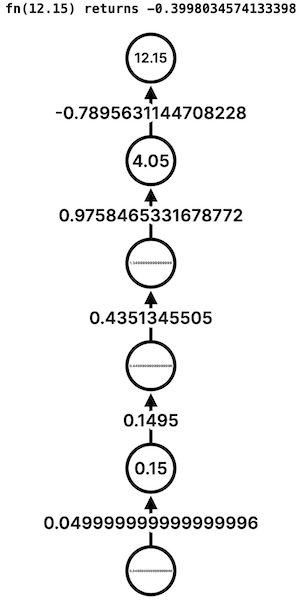

1. 6 times

2. space and number of step is $O(1)$.

## 1.2.4 Exponentiation

Consider the problem of computing the exponential of a given number. We would like a procedure that takes as arguments a base $b$ and a positive integer exponent $n$ and computes $b^{n}$. One way to do this is via the recursive definition 

$$\begin{array}{l}
{b^{n}\, = \, b \cdot b^{n - 1},} \\
{b^{0}\, = \, 1,} \\
\end{array}$$

which translates readily into the procedure

```scheme
(define (expt b n)
  (if (= n 0) 
      1 
      (* b (expt b (- n 1)))))
```

This is a linear recursive process, which requires $\Theta(n)$ steps and $\Theta(n)$ space. Just as with factorial, we can readily formulate an equivalent linear iteration:


```scheme
(define (expt b n) 
  (expt-iter b n 1))

(define (expt-iter b counter product)
  (if (= counter 0)
      product
      (expt-iter b
                 (- counter 1)
                 (* b product))))
```

This version requires $\Theta(n)$ steps and $\Theta(1)$ space.

We can compute exponentials in fewer steps by using successive squaring. For instance, rather than computing $b^{8}$ as 

$${b \cdot (b \cdot (b} \cdot {(b \cdot (b \cdot (b} \cdot {(b \cdot b)))))),}$$

 we can compute it using three multiplications: 

$$\begin{array}{l}
{b^{2}\, = \, b \cdot b,} \\
{b^{4}\, = \, b^{2} \cdot b^{2},} \\
{b^{8}\, = \, b^{4} \cdot b^{4}.} \\
\end{array}$$

 This method works fine for exponents that are powers of 2. We can also take advantage of successive squaring in computing exponentials in general if we use the rule 

$$\begin{array}{ll}
{b^{n}\, = \,(b^{n/2})^{2}} & {\text{if}\; n\;\text{is\ even},} \\
{b^{n}\, = \, b \cdot b^{n - 1}} & {\text{if}\; n\;\text{is\ odd}.} \\
\end{array}$$

 We can express this method as a procedure:

In [ ]:
(define (fast-expt b n)
  (cond ((= n 0) 
         1)
        ((even? n) 
         (square (fast-expt b (/ n 2))))
        (else 
         (* b (fast-expt b (- n 1))))))

where the predicate to test whether an integer is even is defined in terms of the primitive procedure `remainder` by

In [ ]:
(define (even? n)
  (= (remainder n 2) 0))

The process evolved by `fast-expt` grows logarithmically with $n$ in both space and number of steps. To see this, observe that computing $b^{2n}$ using `fast-expt` requires only one more multiplication than computing $b^{n}$. The size of the exponent we can compute therefore doubles (approximately) with every new multiplication we are allowed. Thus, the number of multiplications required for an exponent of $n$ grows about as fast as the logarithm of $n$ to the base 2. The process has $\Theta(\log n)$ growth.^[More precisely, the number of multiplications required is equal to 1 less than the log base 2 of $n$ plus the number of ones in the binary representation of $n$. This total is always less than twice the log base 2 of $n$. The arbitrary constants $k_{1}$ and $k_{2}$ in the definition of order notation imply that, for a logarithmic process, the base to which logarithms are taken does not matter, so all such processes are described as $\Theta(\log n)$.]

The difference between $\Theta(\log n)$ growth and $\Theta(n)$ growth becomes striking as $n$ becomes large. For example, `fast-expt` for $n$ = 1000 requires only 14 multiplications.^[You may wonder why anyone would care about raising numbers to the 1000th power. See [1.2.6](#g_t1_002e2_002e6).] It is also possible to use the idea of successive squaring to devise an iterative algorithm that computes exponentials with a logarithmic number of steps (see [Exercise 1.16](#Exercise-1_002e16)), although, as is often the case with iterative algorithms, this is not written down so straightforwardly as the recursive algorithm.^[This iterative algorithm is ancient. It appears in the Chandah-sutra by Áchárya Pingala, written before 200 B.C. See [Knuth 1981](References.xhtml#Knuth-1981), section 4.6.3, for a full discussion and analysis of this and other methods of exponentiation.]

**Exercise 1.16:** Design a procedure that evolves an iterative exponentiation process that uses successive squaring and uses a logarithmic number of steps, as does `fast-expt`. (Hint: Using the observation that ${(b^{n/2})^{2}} = {(b^{2})^{n/2}}$, keep, along with the exponent $n$ and the base $b$, an additional state variable $a$, and define the state transformation in such a way that the product $ab^{n}$ is unchanged from state to state. At the beginning of the process $a$ is taken to be 1, and the answer is given by the value of $a$ at the end of the process. In general, the technique of defining an *invariant quantity* that remains unchanged from state to state is a powerful way to think about the design of iterative algorithms.)

**Exercise 1.17:** The exponentiation algorithms in this section are based on performing exponentiation by means of repeated multiplication. In a similar way, one can perform integer multiplication by means of repeated addition. The following multiplication procedure (in which it is assumed that our language can only add, not multiply) is analogous to the `expt` procedure:

In [ ]:
(define (* a b)
  (if (= b 0)
      0
      (+ a (* a (- b 1)))))

This algorithm takes a number of steps that is linear in `b`. Now suppose we include, together with addition, operations `double`, which doubles an integer, and `halve`, which divides an (even) integer by 2. Using these, design a multiplication procedure analogous to `fast-expt` that uses a logarithmic number of steps.

**Exercise 1.18:** Using the results of [Exercise 1.16](#Exercise-1_002e16) and [Exercise 1.17](#Exercise-1_002e17), devise a procedure that generates an iterative process for multiplying two integers in terms of adding, doubling, and halving and uses a logarithmic number of steps.^[This algorithm, which is sometimes known as the “Russian peasant method” of multiplication, is ancient. Examples of its use are found in the Rhind Papyrus, one of the two oldest mathematical documents in existence, written about 1700 B.C. (and copied from an even older document) by an Egyptian scribe named A’h-mose.]

**Exercise 1.19:** There is a clever algorithm for computing the Fibonacci numbers in a logarithmic number of steps. Recall the transformation of the state variables $a$ and $b$ in the `fib-iter` process of [1.2.2](#g_t1_002e2_002e2): $a\leftarrow a + b$ and $b\leftarrow a$. Call this transformation $T$, and observe that applying $T$ over and over again $n$ times, starting with 1 and 0, produces the pair $\text{Fib}(n + 1)$ and $\text{Fib}(n)$. In other words, the Fibonacci numbers are produced by applying $T^{n}$, the $n^{\text{th}}$ power of the transformation $T$, starting with the pair (1, 0). Now consider $T$ to be the special case of $p = 0$ and $q = 1$ in a family of transformations $T_{pq}$, where $T_{pq}$ transforms the pair $(a,b)$ according to $a\leftarrow{bq} + {aq} + {ap}$ and $b\leftarrow{bp} + {aq}$. Show that if we apply such a transformation $T_{pq}$ twice, the effect is the same as using a single transformation $T_{p^{\prime}q^{\prime}}$ of the same form, and compute $p^{\prime}\!$ and $q^{\prime}\!$ in terms of $p$ and $q$. This gives us an explicit way to square these transformations, and thus we can compute $T^{n}$ using successive squaring, as in the `fast-expt` procedure. Put this all together to complete the following procedure, which runs in a logarithmic number of steps:

>This exercise was suggested to us by Joe Stoy, based on an example in [Kaldewaij 1990](References.xhtml#Kaldewaij-1990).


```scheme
(define (fib n)
  (fib-iter 1 0 0 1 n))

(define (fib-iter a b p q count)
  (cond ((= count 0) 
         b)
        ((even? count)
         (fib-iter a
                   b
                   ⟨??⟩  ;compute p'
                   ⟨??⟩  ;compute q'
                   (/ count 2)))
        (else 
         (fib-iter (+ (* b q) 
                      (* a q) 
                      (* a p))
                   (+ (* b p) 
                      (* a q))
                   p
                   q
                   (- count 1)))))
```

## 1.2.5 Greatest Common Divisors

The greatest common divisor (GCD) of two integers $a$ and $b$ is defined to be the largest integer that divides both $a$ and $b$ with no remainder. For example, the GCD of 16 and 28 is 4. In [Chapter 2](Chapter-2.xhtml#Chapter-2), when we investigate how to implement rational-number arithmetic, we will need to be able to compute GCDs in order to reduce rational numbers to lowest terms. (To reduce a rational number to lowest terms, we must divide both the numerator and the denominator by their GCD. For example, 16/28 reduces to 4/7.) One way to find the GCD of two integers is to factor them and search for common factors, but there is a famous algorithm that is much more efficient.

The idea of the algorithm is based on the observation that, if $r$ is the remainder when $a$ is divided by $b$, then the common divisors of $a$ and $b$ are precisely the same as the common divisors of $b$ and $r$. Thus, we can use the equation

In [ ]:
GCD(a,b) = GCD(b,r)

to successively reduce the problem of computing a GCD to the problem of computing the GCD of smaller and smaller pairs of integers. For example,

In [ ]:
GCD(206,40) = GCD(40,6)
            = GCD(6,4)
            = GCD(4,2)
            = GCD(2,0) = 2

reduces GCD(206, 40) to GCD(2, 0), which is 2. It is possible to show that starting with any two positive integers and performing repeated reductions will always eventually produce a pair where the second number is 0. Then the GCD is the other number in the pair. This method for computing the GCD is known as *Euclid’s Algorithm*.^[Euclid’s Algorithm is so called because it appears in Euclid’s Elements (Book 7, ca. 300 B.C.). According to [Knuth (1973)](References.xhtml#Knuth-_00281973_0029), it can be considered the oldest known nontrivial algorithm. The ancient Egyptian method of multiplication ([Exercise 1.18](#Exercise-1_002e18)) is surely older, but, as Knuth explains, Euclid’s algorithm is the oldest known to have been presented as a general algorithm, rather than as a set of illustrative examples.]

It is easy to express Euclid’s Algorithm as a procedure:

In [ ]:
(define (gcd a b)
  (if (= b 0)
      a
      (gcd b (remainder a b))))

This generates an iterative process, whose number of steps grows as the logarithm of the numbers involved.

The fact that the number of steps required by Euclid’s Algorithm has logarithmic growth bears an interesting relation to the Fibonacci numbers:

> **Lamé’s Theorem:** If Euclid’s Algorithm requires $k$ steps to compute the GCD of some pair, then the smaller number in the pair must be greater than or equal to the $k^{\text{th}}$ Fibonacci number.^[This theorem was proved in 1845 by Gabriel Lamé, a French mathematician and engineer known chiefly for his contributions to mathematical physics. To prove the theorem, we consider pairs $(a_{k},b_{k})$, where $a_{k} \geq b_{k}$, for which Euclid’s Algorithm terminates in $k$ steps. The proof is based on the claim that, if ${(a_{k + 1},b_{k + 1})}\rightarrow{(a_{k},b_{k})}\rightarrow{(a_{k - 1},b_{k - 1})}$ are three successive pairs in the reduction process, then we must have $b_{k + 1} \geq b_{k} + b_{k - 1}$. To verify the claim, consider that a reduction step is defined by applying the transformation $a_{k - 1} = b_{k}$, $b_{k - 1} =$ remainder of $a_{k}$ divided by $b_{k}$. The second equation means that $a_{k} = {qb_{k}} + b_{k - 1}$ for some positive integer $q$. And since $q$ must be at least 1 we have $a_{k} = {qb_{k}} + b_{k - 1} \geq b_{k} + b_{k - 1}$. But in the previous reduction step we have $b_{k + 1} = a_{k}$. Therefore, $b_{k + 1} = a_{k} \geq b_{k} + b_{k - 1}$. This verifies the claim. Now we can prove the theorem by induction on $k$, the number of steps that the algorithm requires to terminate. The result is true for $k = 1$, since this merely requires that $b$ be at least as large as $\text{Fib}(1) = 1$. Now, assume that the result is true for all integers less than or equal to $k$ and establish the result for $k + 1$. Let ${(a_{k + 1},b_{k + 1})}\rightarrow{(a_{k},b_{k})}\rightarrow{(a_{k - 1},b_{k - 1})}$ be successive pairs in the reduction process. By our induction hypotheses, we have $b_{k - 1} \geq {\text{Fib}(k - 1)}$ and $b_{k} \geq {\text{Fib}(k)}$. Thus, applying the claim we just proved together with the definition of the Fibonacci numbers gives $b_{k + 1} \geq b_{k} + b_{k - 1} \geq {\text{Fib}(k)} + {\text{Fib}(k - 1)} = {\text{Fib}(k + 1)}$, which completes the proof of Lamé’s Theorem.]

We can use this theorem to get an order-of-growth estimate for Euclid’s Algorithm. Let $n$ be the smaller of the two inputs to the procedure. If the process takes $k$ steps, then we must have $n \geq {\text{Fib}(k)} \approx {\varphi^{k}/\sqrt{5}}$. Therefore the number of steps $k$ grows as the logarithm (to the base $\varphi$) of $n$. Hence, the order of growth is $\Theta(\log n)$.

**Exercise 1.20:** The process that a procedure generates is of course dependent on the rules used by the interpreter. As an example, consider the iterative `gcd` procedure given above. Suppose we were to interpret this procedure using normal-order evaluation, as discussed in [1.1.5](1_002e1.xhtml#g_t1_002e1_002e5). (The normal-order-evaluation rule for `if` is described in [Exercise 1.5](1_002e1.xhtml#Exercise-1_002e5).) Using the substitution method (for normal order), illustrate the process generated in evaluating `(gcd 206 40)` and indicate the `remainder` operations that are actually performed. How many `remainder` operations are actually performed in the normal-order evaluation of `(gcd 206 40)`? In the applicative-order evaluation?


## 1.2.6 Example: Testing for Primality

This section describes two methods for checking the primality of an integer $n$, one with order of growth $\Theta(\sqrt{n})$, and a “probabilistic” algorithm with order of growth $\Theta(\log n)$. The exercises at the end of this section suggest programming projects based on these algorithms.


### Searching for divisors

Since ancient times, mathematicians have been fascinated by problems concerning prime numbers, and many people have worked on the problem of determining ways to test if numbers are prime. One way to test if a number is prime is to find the number’s divisors. The following program finds the smallest integral divisor (greater than 1) of a given number $n$. It does this in a straightforward way, by testing $n$ for divisibility by successive integers starting with 2.

In [ ]:
(define (smallest-divisor n)
  (find-divisor n 2))

(define (find-divisor n test-divisor)
  (cond ((> (square test-divisor) n) 
         n)
        ((divides? test-divisor n) 
         test-divisor)
        (else (find-divisor 
               n 
               (+ test-divisor 1)))))

(define (divides? a b)
  (= (remainder b a) 0))

We can test whether a number is prime as follows: $n$ is prime if and only if $n$ is its own smallest divisor.

In [ ]:
(define (prime? n)
  (= n (smallest-divisor n)))

The end test for `find-divisor` is based on the fact that if $n$ is not prime it must have a divisor less than or equal to $\sqrt{n}$.^[If $d$ is a divisor of $n$, then so is $n\,/\, d$. But $d$ and $n\,/\, d$ cannot both be greater than $\sqrt{n}$.] This means that the algorithm need only test divisors between 1 and $\sqrt{n}$. Consequently, the number of steps required to identify $n$ as prime will have order of growth $\Theta(\sqrt{n})$.


### The Fermat test

The $\Theta(\log n)$ primality test is based on a result from number theory known as Fermat’s Little Theorem.^[Pierre de Fermat (1601-1665) is considered to be the founder of modern number theory. He obtained many important number-theoretic results, but he usually announced just the results, without providing his proofs. Fermat’s Little Theorem was stated in a letter he wrote in 1640. The first published proof was given by Euler in 1736 (and an earlier, identical proof was discovered in the unpublished manuscripts of Leibniz). The most famous of Fermat’s results—known as Fermat’s Last Theorem—was jotted down in 1637 in his copy of the book Arithmetic (by the third-century Greek mathematician Diophantus) with the remark “I have discovered a truly remarkable proof, but this margin is too small to contain it.” Finding a proof of Fermat’s Last Theorem became one of the most famous challenges in number theory. A complete solution was finally given in 1995 by Andrew Wiles of Princeton University.]

> **Fermat’s Little Theorem:** If $n$ is a prime number and $a$ is any positive integer less than $n$, then $a$ raised to the $n^{\text{th}}$ power is congruent to $a$ modulo $n$.

(Two numbers are said to be *congruent modulo* $n$ if they both have the same remainder when divided by $n$. The remainder of a number $a$ when divided by $n$ is also referred to as the *remainder of* $a$ *modulo* $n$, or simply as $a$ *modulo* $n$.)

If $n$ is not prime, then, in general, most of the numbers $a < n$ will not satisfy the above relation. This leads to the following algorithm for testing primality: Given a number $n$, pick a random number $a < n$ and compute the remainder of $a^{n}$ modulo $n$. If the result is not equal to $a$, then $n$ is certainly not prime. If it is $a$, then chances are good that $n$ is prime. Now pick another random number $a$ and test it with the same method. If it also satisfies the equation, then we can be even more confident that $n$ is prime. By trying more and more values of $a$, we can increase our confidence in the result. This algorithm is known as the Fermat test.

To implement the Fermat test, we need a procedure that computes the exponential of a number modulo another number:

In [ ]:
(define (expmod base exp m)
  (cond ((= exp 0) 1)
        ((even? exp)
         (remainder 
          (square (expmod base (/ exp 2) m))
          m))
        (else
         (remainder 
          (* base (expmod base (- exp 1) m))
          m))))

This is very similar to the `fast-expt` procedure of [1.2.4](#g_t1_002e2_002e4). It uses successive squaring, so that the number of steps grows logarithmically with the exponent.^[The reduction steps in the cases where the exponent $e$ is greater than 1 are based on the fact that, for any integers $x$, $y$, and $m$, we can find the remainder of $x$ times $y$ modulo $m$ by computing separately the remainders of $x$ modulo $m$ and $y$ modulo $m$, multiplying these, and then taking the remainder of the result modulo $m$. For instance, in the case where $e$ is even, we compute the remainder of $b^{e/2}$ modulo $m$, square this, and take the remainder modulo $m$. This technique is useful because it means we can perform our computation without ever having to deal with numbers much larger than $m$. (Compare [Exercise 1.25](#Exercise-1_002e25).)]

The Fermat test is performed by choosing at random a number $a$ between 1 and $n - 1$ inclusive and checking whether the remainder modulo $n$ of the $n^{\text{th}}$ power of $a$ is equal to $a$. The random number $a$ is chosen using the procedure `random`, which we assume is included as a primitive in Scheme. `Random` returns a nonnegative integer less than its integer input. Hence, to obtain a random number between 1 and $n - 1$, we call `random` with an input of $n - 1$ and add 1 to the result:

In [ ]:
(define (fermat-test n)
  (define (try-it a)
    (= (expmod a n n) a))
  (try-it (+ 1 (random (- n 1)))))

The following procedure runs the test a given number of times, as specified by a parameter. Its value is true if the test succeeds every time, and false otherwise.

In [ ]:
(define (fast-prime? n times)
  (cond ((= times 0) true)
        ((fermat-test n) 
         (fast-prime? n (- times 1)))
        (else false)))

### Probabilistic methods

The Fermat test differs in character from most familiar algorithms, in which one computes an answer that is guaranteed to be correct. Here, the answer obtained is only probably correct. More precisely, if $n$ ever fails the Fermat test, we can be certain that $n$ is not prime. But the fact that $n$ passes the test, while an extremely strong indication, is still not a guarantee that $n$ is prime. What we would like to say is that for any number $n$, if we perform the test enough times and find that $n$ always passes the test, then the probability of error in our primality test can be made as small as we like.

Unfortunately, this assertion is not quite correct. There do exist numbers that fool the Fermat test: numbers $n$ that are not prime and yet have the property that $a^{n}$ is congruent to $a$ modulo $n$ for all integers $a < n$. Such numbers are extremely rare, so the Fermat test is quite reliable in practice.

>umbers that fool the Fermat test are called *Carmichael numbers*, and little is known about them other than that they are extremely rare. There are 255 Carmichael numbers below 100,000,000. The smallest few are 561, 1105, 1729, 2465, 2821, and 6601. In testing primality of very large numbers chosen at random, the chance of stumbling upon a value that fools the Fermat test is less than the chance that cosmic radiation will cause the computer to make an error in carrying out a “correct” algorithm. Considering an algorithm to be inadequate for the first reason but not for the second illustrates the difference between mathematics and engineering.

There are variations of the Fermat test that cannot be fooled. In these tests, as with the Fermat method, one tests the primality of an integer $n$ by choosing a random integer $a < n$ and checking some condition that depends upon $n$ and $a$. (See [Exercise 1.28](#Exercise-1_002e28) for an example of such a test.) On the other hand, in contrast to the Fermat test, one can prove that, for any $n$, the condition does not hold for most of the integers $a < n$ unless $n$ is prime. Thus, if $n$ passes the test for some random choice of $a$, the chances are better than even that $n$ is prime. If $n$ passes the test for two random choices of $a$, the chances are better than 3 out of 4 that $n$ is prime. By running the test with more and more randomly chosen values of $a$ we can make the probability of error as small as we like.

The existence of tests for which one can prove that the chance of error becomes arbitrarily small has sparked interest in algorithms of this type, which have come to be known as *probabilistic algorithms*. There is a great deal of research activity in this area, and probabilistic algorithms have been fruitfully applied to many fields.

>One of the most striking applications of probabilistic prime testing has been to the field of cryptography. Although it is now computationally infeasible to factor an arbitrary 200-digit number, the primality of such a number can be checked in a few seconds with the Fermat test. This fact forms the basis of a technique for constructing “unbreakable codes” suggested by [Rivest et al. (1977)](References.xhtml#Rivest-et-al_002e-_00281977_0029). The resulting *RSA algorithm* has become a widely used technique for enhancing the security of electronic communications. Because of this and related developments, the study of prime numbers, once considered the epitome of a topic in “pure” mathematics to be studied only for its own sake, now turns out to have important practical applications to cryptography, electronic funds transfer, and information retrieval.

**Exercise 1.21:** Use the `smallest-divisor` procedure to find the smallest divisor of each of the following numbers: 199, 1999, 19999.

**Exercise 1.22:** Most Lisp implementations include a primitive called `runtime` that returns an integer that specifies the amount of time the system has been running (measured, for example, in microseconds). The following `timed-prime-test` procedure, when called with an integer $n$, prints $n$ and checks to see if $n$ is prime. If $n$ is prime, the procedure prints three asterisks followed by the amount of time used in performing the test.

```scheme
(define (timed-prime-test n)
  (newline)
  (display n)
  (start-prime-test n (runtime)))

(define (start-prime-test n start-time)
  (if (prime? n)
      (report-prime (- (runtime) 
                       start-time))))

(define (report-prime elapsed-time)
  (display " *** ")
  (display elapsed-time))
```

Using this procedure, write a procedure `search-for-primes` that checks the primality of consecutive odd integers in a specified range. Use your procedure to find the three smallest primes larger than 1000; larger than 10,000; larger than 100,000; larger than 1,000,000. Note the time needed to test each prime. Since the testing algorithm has order of growth of $\Theta(\sqrt{n})$, you should expect that testing for primes around 10,000 should take about $\sqrt{10}$ times as long as testing for primes around 1000. Do your timing data bear this out? How well do the data for 100,000 and 1,000,000 support the $\Theta(\sqrt{n})$ prediction? Is your result compatible with the notion that programs on your machine run in time proportional to the number of steps required for the computation?

**Exercise 1.23:** The `smallest-divisor` procedure shown at the start of this section does lots of needless testing: After it checks to see if the number is divisible by 2 there is no point in checking to see if it is divisible by any larger even numbers. This suggests that the values used for `test-divisor` should not be 2, 3, 4, 5, 6, …, but rather 2, 3, 5, 7, 9, …. To implement this change, define a procedure `next` that returns 3 if its input is equal to 2 and otherwise returns its input plus 2. Modify the `smallest-divisor` procedure to use `(next test-divisor)` instead of `(+ test-divisor 1)`. With `timed-prime-test` incorporating this modified version of `smallest-divisor`, run the test for each of the 12 primes found in [Exercise 1.22](#Exercise-1_002e22). Since this modification halves the number of test steps, you should expect it to run about twice as fast. Is this expectation confirmed? If not, what is the observed ratio of the speeds of the two algorithms, and how do you explain the fact that it is different from 2?

**Exercise 1.24:** Modify the `timed-prime-test` procedure of [Exercise 1.22](#Exercise-1_002e22) to use `fast-prime?` (the Fermat method), and test each of the 12 primes you found in that exercise. Since the Fermat test has $\Theta(\log n)$ growth, how would you expect the time to test primes near 1,000,000 to compare with the time needed to test primes near 1000? Do your data bear this out? Can you explain any discrepancy you find?

**Exercise 1.25:** Alyssa P. Hacker complains that we went to a lot of extra work in writing `expmod`. After all, she says, since we already know how to compute exponentials, we could have simply written

```scheme
(define (expmod base exp m)
  (remainder (fast-expt base exp) m))
```

Is she correct? Would this procedure serve as well for our fast prime tester? Explain.

**Exercise 1.26:** Louis Reasoner is having great difficulty doing [Exercise 1.24](#Exercise-1_002e24). His `fast-prime?` test seems to run more slowly than his `prime?` test. Louis calls his friend Eva Lu Ator over to help. When they examine Louis’s code, they find that he has rewritten the `expmod` procedure to use an explicit multiplication, rather than calling `square`:

```scheme
(define (expmod base exp m)
  (cond ((= exp 0) 1)
        ((even? exp)
         (remainder 
          (* (expmod base (/ exp 2) m)
             (expmod base (/ exp 2) m))
          m))
        (else
         (remainder 
          (* base 
             (expmod base (- exp 1) m))
          m))))
```

“I don’t see what difference that could make,” says Louis. “I do.” says Eva. “By writing the procedure like that, you have transformed the $\Theta(\log n)$ process into a $\Theta(n)$ process.” Explain.

**Exercise 1.27:** Demonstrate that the Carmichael numbers listed in [Footnote 47](#Footnote-47) really do fool the Fermat test. That is, write a procedure that takes an integer $n$ and tests whether $a^{n}$ is congruent to $a$ modulo $n$ for every $a < n$, and try your procedure on the given Carmichael numbers.

**Exercise 1.28:** One variant of the Fermat test that cannot be fooled is called the *Miller-Rabin test* ([Miller 1976](References.xhtml#Miller-1976); [Rabin 1980](References.xhtml#Rabin-1980)). This starts from an alternate form of Fermat’s Little Theorem, which states that if $n$ is a prime number and $a$ is any positive integer less than $n$, then $a$ raised to the $(n - 1)$-st power is congruent to 1 modulo $n$. To test the primality of a number $n$ by the Miller-Rabin test, we pick a random number $a < n$ and raise $a$ to the $(n - 1)$-st power modulo $n$ using the `expmod` procedure. However, whenever we perform the squaring step in `expmod`, we check to see if we have discovered a “nontrivial square root of 1 modulo $n$,” that is, a number not equal to 1 or $n - 1$ whose square is equal to 1 modulo $n$. It is possible to prove that if such a nontrivial square root of 1 exists, then $n$ is not prime. It is also possible to prove that if $n$ is an odd number that is not prime, then, for at least half the numbers $a < n$, computing $a^{n - 1}$ in this way will reveal a nontrivial square root of 1 modulo $n$. (This is why the Miller-Rabin test cannot be fooled.) Modify the `expmod` procedure to signal if it discovers a nontrivial square root of 1, and use this to implement the Miller-Rabin test with a procedure analogous to `fermat-test`. Check your procedure by testing various known primes and non-primes. Hint: One convenient way to make `expmod` signal is to have it return 0.